In [2]:
%matplotlib notebook
import os

import re
import csv

import numpy as np
import pandas as pd

import dicom
from collections import Counter

from data_utils import im_path_to_arr
from data_utils import arr_to_im_path
from mri_viewer import MRIViewer

In [36]:
# for RTOG
patient_id = 10
ex_path = '/local-scratch/romain_scratch/rtog/'
patient = os.listdir(ex_path)[patient_id - 1]
patient_path = os.path.join(ex_path, patient)
flair_path = os.path.join(patient_path, 'flair.nii')
flair_rtog = im_path_to_arr(flair_path)
t1post_path = os.path.join(patient_path, 't1c.nii')
t1post_rtog = im_path_to_arr(t1post_path)
print('shape of rtog patient is:', t1post_rtog.shape)

shape of rtog patient is: (30, 512, 512)


In [37]:
# for BraTS
patient_id = 12
ex_path = '/local-scratch/romain_scratch/brats2017/train/'
patient = os.listdir(ex_path)[patient_id - 1]
patient_path = os.path.join(ex_path, patient)
label_path = os.path.join(patient_path, patient + '_seg.nii')
label = im_path_to_arr(label_path)
flair_path = os.path.join(patient_path, patient + '_flair.nii')
flair_brats = im_path_to_arr(flair_path)
t1post_path = os.path.join(patient_path, patient + '_t1ce.nii')
t1post_brats = im_path_to_arr(t1post_path)
print('shape of brats patient is:', t1post_brats.shape)

shape of brats patient is: (155, 240, 240)


In [29]:
print('max value for t1post: brats %d ... rtog %d '%(t1post_brats.max(), t1post_rtog.max()))
print('min value for t1post: brats %d ... rtog %d '%(t1post_brats.min(), t1post_rtog.min()))
print('mean value for t1post: brats %d ... rtog %d '%(t1post_brats.mean(), t1post_rtog.mean()))
print('var value for t1post: brats %d ... rtog %d '%(t1post_brats.var(), t1post_rtog.var()))
print('median value for t1post: brats %d ... rtog %d '%(np.median(t1post_brats), np.median(t1post_rtog)))

max value for t1post: brats 2285 ... rtog 3317 
min value for t1post: brats 0 ... rtog 0 
mean value for t1post: brats 62 ... rtog 301 
var value for t1post: brats 23905 ... rtog 123352 
median value for t1post: brats 0 ... rtog 55 


In [30]:
print('max value for flair: brats %d ... rtog %d '%(flair_brats.max(), flair_rtog.max()))
print('min value for flair: brats %d ... rtog %d '%(flair_brats.min(), flair_rtog.min()))
print('mean value for flair: brats %d ... rtog %d '%(flair_brats.mean(), flair_rtog.mean()))
print('var value for flair: brats %d ... rtog %d '%(flair_brats.var(), flair_rtog.var()))
print('median value for flair: brats %d ... rtog %d '%(np.median(flair_brats), np.median(flair_rtog)))

max value for flair: brats 1159 ... rtog 1511 
min value for flair: brats 0 ... rtog 0 
mean value for flair: brats 58 ... rtog 186 
var value for flair: brats 20556 ... rtog 58610 
median value for flair: brats 0 ... rtog 41 


<IPython.core.display.Javascript object>


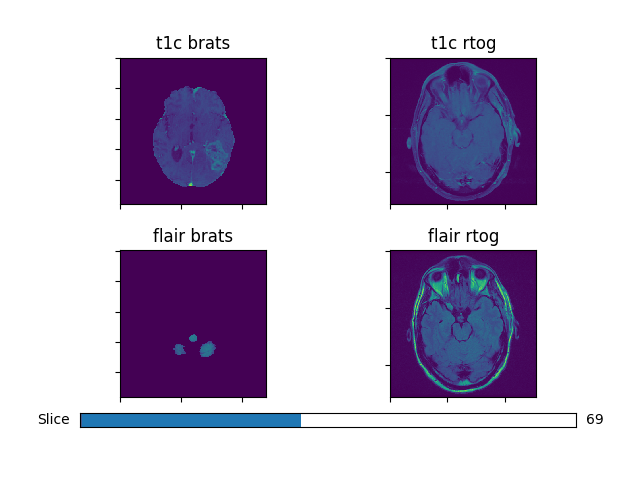

In [35]:
MRIViewer(t1post_brats, t1post_rtog, flair_brats, flair_rtog, cmap=None,\
          title1='t1c brats', title2='t1c rtog', title3='flair brats', title4='flair rtog')

### TODO:
- cut off top and bottom of the brain in brats and train only on the new volumes

/usr/local/fsl/bin/bet /usr/local/fsl/bin/imglob rtog_pre/t1c.nii /usr/local/fsl/bin/imglob rtog_post/t1c.nii -f 0.5 -g 0 -m -Z


In [13]:
import gzip

In [25]:
direct = '/home/romains/rtog_post/'

#with gzip.open(os.path.join(direct, 't1c.nii.gz'), 'rb') as fgz:
#    with open(os.path.join(direct, 't1c.nii'), 'wb') as f:
#               f.write(fgz.read())

In [26]:
t1c_pre = im_path_to_arr('/home/romains/rtog_pre/t1c.nii')
t1c_post = im_path_to_arr(os.path.join(direct, 't1c.nii'))

<IPython.core.display.Javascript object>


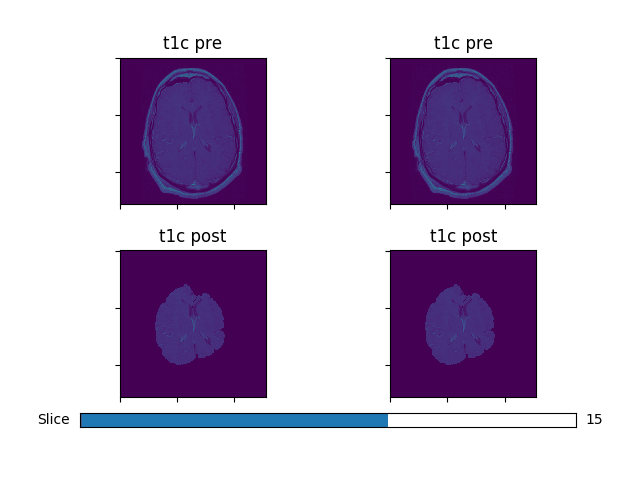

In [27]:
MRIViewer(t1c_pre, t1c_pre, t1c_post, t1c_post, cmap=None,\
          title1='t1c pre', title2='t1c pre', title3='t1c post', title4='t1c post')